##Group_11##
Karan Sharma (202318018)

Aditya Tripathi (202318046)

Anurag Choudhury (202318059)


#Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from scipy.cluster import hierarchy

In [2]:
df_new=pd.read_excel("/content/CLeaned State Wise Data 2008-2013.xlsx")
df_new

,Unnamed: 0,S. No.,State / UT,Year of GE to SLA,Reserved SC Seats,Reserved ST Seats,Total No. of Seats,No. Of Male Contestants,No. Of Female Contestant,No. Of Third Gender,...,No. of Electors Who Voted \n(Excluding Postal Votes)\n[In '000] Female,Total Votes Polled*\n[In '000],Polling Percentage (Excluding Postal Ballots) Male,Polling Percentage (Excluding Postal Ballots) Female,State Poll %\n,No. of Polling Stations (PS),Average Number of Electors per PS,Postal Votes,Rejected Postal Votes,NOTA
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,Chhattisgarh,2023.0,10.0,29.0,90.0,1025.0,155.0,1.0,...,7813.2,15666.5,76.31,76.17,76.75,24137.0,846.0,103861.0,9732.0,197678.0
2,NaN,2.0,Karnataka,2023.0,36.0,15.0,224.0,2429.0,185.0,1.0,...,19191.1,39229.9,73.58,72.69,73.84,58534.0,908.0,372516.0,49280.0,269764.0
3,NaN,3.0,Madhya Pradesh,2023.0,35.0,47.0,230.0,2281.0,252.0,1.0,...,20690.3,43580.9,77.99,76.06,77.74,64626.0,867.0,386479.0,46125.0,427710.0
4,NaN,4.0,Meghalaya,2023.0,0.0,55.0,60.0,339.0,36.0,0.0,...,958.9,1891.8,83.11,87.25,86.81,3482.0,626.0,35260.0,2510.0,14952.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,NaN,96.0,Meghalaya,2008.0,0.0,55.0,60.0,317.0,21.0,NaN,...,560.0,1102.7,88.62,89.36,88.84,1599.0,771.0,5171.0,520.0,NaN
97,NaN,97.0,Mizoram,2008.0,0.0,39.0,40.0,197.0,9.0,NaN,...,251.1,503.7,78.77,81.24,82.35,1026.0,596.0,14245.0,709.0,NaN
98,NaN,98.0,Nagaland,2008.0,0.0,59.0,60.0,214.0,4.0,NaN,...,549.4,1135.1,85.99,86.39,87.25,1780.0,732.0,12734.0,1896.0,NaN
99,NaN,99.0,Rajasthan,2008.0,34.0,25.0,200.0,2040.0,154.0,NaN,...,11251.4,24117.5,67.10,65.31,66.49,42591.0,852.0,87311.0,15492.0,NaN


In [3]:
# Remove the "S. No." column
df = df_new.drop(columns=['S. No.','Unnamed: 0'])

# Reset the index after column removal and display the updated dataframe
df.reset_index(drop=True, inplace=True)

df


,State / UT,Year of GE to SLA,Reserved SC Seats,Reserved ST Seats,Total No. of Seats,No. Of Male Contestants,No. Of Female Contestant,No. Of Third Gender,Total No. Of Candidates,Elected Male Candidates,...,No. of Electors Who Voted \n(Excluding Postal Votes)\n[In '000] Female,Total Votes Polled*\n[In '000],Polling Percentage (Excluding Postal Ballots) Male,Polling Percentage (Excluding Postal Ballots) Female,State Poll %\n,No. of Polling Stations (PS),Average Number of Electors per PS,Postal Votes,Rejected Postal Votes,NOTA
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Chhattisgarh,2023.0,10.0,29.0,90.0,1025.0,155.0,1.0,1181.0,71.0,...,7813.2,15666.5,76.31,76.17,76.75,24137.0,846.0,103861.0,9732.0,197678.0
2,Karnataka,2023.0,36.0,15.0,224.0,2429.0,185.0,1.0,2615.0,214.0,...,19191.1,39229.9,73.58,72.69,73.84,58534.0,908.0,372516.0,49280.0,269764.0
3,Madhya Pradesh,2023.0,35.0,47.0,230.0,2281.0,252.0,1.0,2534.0,203.0,...,20690.3,43580.9,77.99,76.06,77.74,64626.0,867.0,386479.0,46125.0,427710.0
4,Meghalaya,2023.0,0.0,55.0,60.0,339.0,36.0,0.0,375.0,57.0,...,958.9,1891.8,83.11,87.25,86.81,3482.0,626.0,35260.0,2510.0,14952.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Meghalaya,2008.0,0.0,55.0,60.0,317.0,21.0,NaN,338.0,59.0,...,560.0,1102.7,88.62,89.36,88.84,1599.0,771.0,5171.0,520.0,NaN
97,Mizoram,2008.0,0.0,39.0,40.0,197.0,9.0,NaN,206.0,40.0,...,251.1,503.7,78.77,81.24,82.35,1026.0,596.0,14245.0,709.0,NaN
98,Nagaland,2008.0,0.0,59.0,60.0,214.0,4.0,NaN,218.0,60.0,...,549.4,1135.1,85.99,86.39,87.25,1780.0,732.0,12734.0,1896.0,NaN
99,Rajasthan,2008.0,34.0,25.0,200.0,2040.0,154.0,NaN,2194.0,172.0,...,11251.4,24117.5,67.10,65.31,66.49,42591.0,852.0,87311.0,15492.0,NaN


In [4]:
# Remove the 0th row from the dataset
df_new = df.drop(index=0).reset_index(drop=True)

df_new


,State / UT,Year of GE to SLA,Reserved SC Seats,Reserved ST Seats,Total No. of Seats,No. Of Male Contestants,No. Of Female Contestant,No. Of Third Gender,Total No. Of Candidates,Elected Male Candidates,...,No. of Electors Who Voted \n(Excluding Postal Votes)\n[In '000] Female,Total Votes Polled*\n[In '000],Polling Percentage (Excluding Postal Ballots) Male,Polling Percentage (Excluding Postal Ballots) Female,State Poll %\n,No. of Polling Stations (PS),Average Number of Electors per PS,Postal Votes,Rejected Postal Votes,NOTA
0,Chhattisgarh,2023.0,10.0,29.0,90.0,1025.0,155.0,1.0,1181.0,71.0,...,7813.2,15666.5,76.31,76.17,76.75,24137.0,846.0,103861.0,9732.0,197678.0
1,Karnataka,2023.0,36.0,15.0,224.0,2429.0,185.0,1.0,2615.0,214.0,...,19191.1,39229.9,73.58,72.69,73.84,58534.0,908.0,372516.0,49280.0,269764.0
2,Madhya Pradesh,2023.0,35.0,47.0,230.0,2281.0,252.0,1.0,2534.0,203.0,...,20690.3,43580.9,77.99,76.06,77.74,64626.0,867.0,386479.0,46125.0,427710.0
3,Meghalaya,2023.0,0.0,55.0,60.0,339.0,36.0,0.0,375.0,57.0,...,958.9,1891.8,83.11,87.25,86.81,3482.0,626.0,35260.0,2510.0,14952.0
4,Mizoram,2023.0,0.0,39.0,40.0,156.0,18.0,0.0,174.0,37.0,...,356.7,705.1,79.01,81.33,82.26,1276.0,672.0,17726.0,843.0,2779.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Meghalaya,2008.0,0.0,55.0,60.0,317.0,21.0,NaN,338.0,59.0,...,560.0,1102.7,88.62,89.36,88.84,1599.0,771.0,5171.0,520.0,NaN
96,Mizoram,2008.0,0.0,39.0,40.0,197.0,9.0,NaN,206.0,40.0,...,251.1,503.7,78.77,81.24,82.35,1026.0,596.0,14245.0,709.0,NaN
97,Nagaland,2008.0,0.0,59.0,60.0,214.0,4.0,NaN,218.0,60.0,...,549.4,1135.1,85.99,86.39,87.25,1780.0,732.0,12734.0,1896.0,NaN
98,Rajasthan,2008.0,34.0,25.0,200.0,2040.0,154.0,NaN,2194.0,172.0,...,11251.4,24117.5,67.10,65.31,66.49,42591.0,852.0,87311.0,15492.0,NaN


In [5]:
# Display the column names of the cleaned dataset
df_new.columns.tolist()


['State / UT',
 'Year of GE to SLA',
 'Reserved SC Seats',
 'Reserved ST Seats',
 'Total No. of Seats',
 'No. Of Male Contestants',
 'No. Of Female Contestant',
 'No. Of Third Gender',
 'Total No. Of Candidates',
 'Elected Male Candidates',
 'Elected Female Candidates',
 'Elected Third Gender Candidates',
 'Total Elected Candidates',
 'Elected Female %',
 'Forfeited Deposits Male',
 'Forfeited Deposit Female',
 'Forfeited Deposit Third Gender',
 'Total Forfeited',
 'Average Contestants Per Constituency',
 "No. of Electors \n(Including Service Electors)\n[In '000] Male",
 "No. of Electors \n(Including Service Electors)\n[In '000] Female",
 "Total No. of Electors \n(Including Service Electors)\n[In '000]*",
 "No. of Electors Who Voted \n(Excluding Postal Votes)\n[In '000] Male",
 "No. of Electors Who Voted \n(Excluding Postal Votes)\n[In '000] Female",
 "Total Votes Polled*\n[In '000]",
 'Polling Percentage (Excluding Postal Ballots) Male',
 'Polling Percentage (Excluding Postal Ballots)

In [6]:
# Renaming the columns as per the user's request
df_1 = df_new.rename(columns={
    "No. of Electors \n(Including Service Electors)\n[In '000] Male": "Electors (Male)",
    "No. of Electors \n(Including Service Electors)\n[In '000] Female": "Electors (Female)",
    "Total No. of Electors \n(Including Service Electors)\n[In '000]*": "Total Electors",
    "No. of Electors Who Voted \n(Excluding Postal Votes)\n[In '000] Male": "Voters (Male)",
    "No. of Electors Who Voted \n(Excluding Postal Votes)\n[In '000] Female": "Voters (Female)",
    "Total Votes Polled*\n[In '000]": "Total Votes Polled"
})

# Multiply relevant columns by 1000 to reflect actual values
columns_to_multiply = ["Electors (Male)", "Electors (Female)", "Total Electors",
                       "Voters (Male)", "Voters (Female)", "Total Votes Polled"]

df_1[columns_to_multiply] = df_1[columns_to_multiply].apply(lambda x: x * 1000)

# Display the updated dataframe
df_1



,State / UT,Year of GE to SLA,Reserved SC Seats,Reserved ST Seats,Total No. of Seats,No. Of Male Contestants,No. Of Female Contestant,No. Of Third Gender,Total No. Of Candidates,Elected Male Candidates,...,Voters (Female),Total Votes Polled,Polling Percentage (Excluding Postal Ballots) Male,Polling Percentage (Excluding Postal Ballots) Female,State Poll %\n,No. of Polling Stations (PS),Average Number of Electors per PS,Postal Votes,Rejected Postal Votes,NOTA
0,Chhattisgarh,2023.0,10.0,29.0,90.0,1025.0,155.0,1.0,1181.0,71.0,...,7813200.0,15666500.0,76.31,76.17,76.75,24137.0,846.0,103861.0,9732.0,197678.0
1,Karnataka,2023.0,36.0,15.0,224.0,2429.0,185.0,1.0,2615.0,214.0,...,19191100.0,39229900.0,73.58,72.69,73.84,58534.0,908.0,372516.0,49280.0,269764.0
2,Madhya Pradesh,2023.0,35.0,47.0,230.0,2281.0,252.0,1.0,2534.0,203.0,...,20690300.0,43580900.0,77.99,76.06,77.74,64626.0,867.0,386479.0,46125.0,427710.0
3,Meghalaya,2023.0,0.0,55.0,60.0,339.0,36.0,0.0,375.0,57.0,...,958900.0,1891800.0,83.11,87.25,86.81,3482.0,626.0,35260.0,2510.0,14952.0
4,Mizoram,2023.0,0.0,39.0,40.0,156.0,18.0,0.0,174.0,37.0,...,356700.0,705100.0,79.01,81.33,82.26,1276.0,672.0,17726.0,843.0,2779.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Meghalaya,2008.0,0.0,55.0,60.0,317.0,21.0,NaN,338.0,59.0,...,560000.0,1102700.0,88.62,89.36,88.84,1599.0,771.0,5171.0,520.0,NaN
96,Mizoram,2008.0,0.0,39.0,40.0,197.0,9.0,NaN,206.0,40.0,...,251100.0,503700.0,78.77,81.24,82.35,1026.0,596.0,14245.0,709.0,NaN
97,Nagaland,2008.0,0.0,59.0,60.0,214.0,4.0,NaN,218.0,60.0,...,549400.0,1135100.0,85.99,86.39,87.25,1780.0,732.0,12734.0,1896.0,NaN
98,Rajasthan,2008.0,34.0,25.0,200.0,2040.0,154.0,NaN,2194.0,172.0,...,11251400.0,24117500.0,67.10,65.31,66.49,42591.0,852.0,87311.0,15492.0,NaN


In [7]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 33 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   State / UT                                            100 non-null    object 
 1   Year of GE to SLA                                     100 non-null    float64
 2   Reserved SC Seats                                     100 non-null    float64
 3   Reserved ST Seats                                     100 non-null    float64
 4   Total No. of Seats                                    100 non-null    float64
 5   No. Of Male Contestants                               100 non-null    float64
 6   No. Of Female Contestant                              100 non-null    float64
 7   No. Of Third Gender                                   83 non-null     float64
 8   Total No. Of Candidates                               100 non

In [8]:
# Convert 'Average Contestants Per Constituency' to numeric and coerce errors
df_1['Average Contestants Per Constituency'] = pd.to_numeric(df_1['Average Contestants Per Constituency'], errors='coerce')

In [9]:
df_1.shape

(100, 33)

In [10]:
df_1.isnull()

,State / UT,Year of GE to SLA,Reserved SC Seats,Reserved ST Seats,Total No. of Seats,No. Of Male Contestants,No. Of Female Contestant,No. Of Third Gender,Total No. Of Candidates,Elected Male Candidates,...,Voters (Female),Total Votes Polled,Polling Percentage (Excluding Postal Ballots) Male,Polling Percentage (Excluding Postal Ballots) Female,State Poll %\n,No. of Polling Stations (PS),Average Number of Electors per PS,Postal Votes,Rejected Postal Votes,NOTA
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
96,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
97,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
98,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


In [11]:
null_values = df_1.isnull().sum()

null_values

,0
State / UT,0
Year of GE to SLA,0
Reserved SC Seats,0
Reserved ST Seats,0
Total No. of Seats,0
No. Of Male Contestants,0
No. Of Female Contestant,0
No. Of Third Gender,17
Total No. Of Candidates,0
Elected Male Candidates,0


In [12]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 33 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   State / UT                                            100 non-null    object 
 1   Year of GE to SLA                                     100 non-null    float64
 2   Reserved SC Seats                                     100 non-null    float64
 3   Reserved ST Seats                                     100 non-null    float64
 4   Total No. of Seats                                    100 non-null    float64
 5   No. Of Male Contestants                               100 non-null    float64
 6   No. Of Female Contestant                              100 non-null    float64
 7   No. Of Third Gender                                   83 non-null     float64
 8   Total No. Of Candidates                               100 non

In [13]:
# Check for any completely empty rows and remove them
df_1 = df_1.dropna(how='all').reset_index(drop=True)
df_1

,State / UT,Year of GE to SLA,Reserved SC Seats,Reserved ST Seats,Total No. of Seats,No. Of Male Contestants,No. Of Female Contestant,No. Of Third Gender,Total No. Of Candidates,Elected Male Candidates,...,Voters (Female),Total Votes Polled,Polling Percentage (Excluding Postal Ballots) Male,Polling Percentage (Excluding Postal Ballots) Female,State Poll %\n,No. of Polling Stations (PS),Average Number of Electors per PS,Postal Votes,Rejected Postal Votes,NOTA
0,Chhattisgarh,2023.0,10.0,29.0,90.0,1025.0,155.0,1.0,1181.0,71.0,...,7813200.0,15666500.0,76.31,76.17,76.75,24137.0,846.0,103861.0,9732.0,197678.0
1,Karnataka,2023.0,36.0,15.0,224.0,2429.0,185.0,1.0,2615.0,214.0,...,19191100.0,39229900.0,73.58,72.69,73.84,58534.0,908.0,372516.0,49280.0,269764.0
2,Madhya Pradesh,2023.0,35.0,47.0,230.0,2281.0,252.0,1.0,2534.0,203.0,...,20690300.0,43580900.0,77.99,76.06,77.74,64626.0,867.0,386479.0,46125.0,427710.0
3,Meghalaya,2023.0,0.0,55.0,60.0,339.0,36.0,0.0,375.0,57.0,...,958900.0,1891800.0,83.11,87.25,86.81,3482.0,626.0,35260.0,2510.0,14952.0
4,Mizoram,2023.0,0.0,39.0,40.0,156.0,18.0,0.0,174.0,37.0,...,356700.0,705100.0,79.01,81.33,82.26,1276.0,672.0,17726.0,843.0,2779.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Meghalaya,2008.0,0.0,55.0,60.0,317.0,21.0,NaN,338.0,59.0,...,560000.0,1102700.0,88.62,89.36,88.84,1599.0,771.0,5171.0,520.0,NaN
96,Mizoram,2008.0,0.0,39.0,40.0,197.0,9.0,NaN,206.0,40.0,...,251100.0,503700.0,78.77,81.24,82.35,1026.0,596.0,14245.0,709.0,NaN
97,Nagaland,2008.0,0.0,59.0,60.0,214.0,4.0,NaN,218.0,60.0,...,549400.0,1135100.0,85.99,86.39,87.25,1780.0,732.0,12734.0,1896.0,NaN
98,Rajasthan,2008.0,34.0,25.0,200.0,2040.0,154.0,NaN,2194.0,172.0,...,11251400.0,24117500.0,67.10,65.31,66.49,42591.0,852.0,87311.0,15492.0,NaN


In [14]:
'''
# Save the cleaned DataFrame to an Excel file in the current directory
output_file_path = 'cleaned_dataset.xlsx'
df_1.to_excel(output_file_path, index=False)

# Download the file to your local machine
from google.colab import files
files.download(output_file_path)
'''


"\n# Save the cleaned DataFrame to an Excel file in the current directory\noutput_file_path = 'cleaned_dataset.xlsx'\ndf_1.to_excel(output_file_path, index=False)\n\n# Download the file to your local machine\nfrom google.colab import files\nfiles.download(output_file_path)\n"

In [15]:
null_values = df_1.isnull().sum()

null_values

,0
State / UT,0
Year of GE to SLA,0
Reserved SC Seats,0
Reserved ST Seats,0
Total No. of Seats,0
No. Of Male Contestants,0
No. Of Female Contestant,0
No. Of Third Gender,17
Total No. Of Candidates,0
Elected Male Candidates,0


In [16]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 33 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   State / UT                                            100 non-null    object 
 1   Year of GE to SLA                                     100 non-null    float64
 2   Reserved SC Seats                                     100 non-null    float64
 3   Reserved ST Seats                                     100 non-null    float64
 4   Total No. of Seats                                    100 non-null    float64
 5   No. Of Male Contestants                               100 non-null    float64
 6   No. Of Female Contestant                              100 non-null    float64
 7   No. Of Third Gender                                   83 non-null     float64
 8   Total No. Of Candidates                               100 non

In [17]:
# Display the column names of the cleaned dataset
df_1.columns.tolist()


['State / UT',
 'Year of GE to SLA',
 'Reserved SC Seats',
 'Reserved ST Seats',
 'Total No. of Seats',
 'No. Of Male Contestants',
 'No. Of Female Contestant',
 'No. Of Third Gender',
 'Total No. Of Candidates',
 'Elected Male Candidates',
 'Elected Female Candidates',
 'Elected Third Gender Candidates',
 'Total Elected Candidates',
 'Elected Female %',
 'Forfeited Deposits Male',
 'Forfeited Deposit Female',
 'Forfeited Deposit Third Gender',
 'Total Forfeited',
 'Average Contestants Per Constituency',
 'Electors (Male)',
 'Electors (Female)',
 'Total Electors',
 'Voters (Male)',
 'Voters (Female)',
 'Total Votes Polled',
 'Polling Percentage (Excluding Postal Ballots) Male',
 'Polling Percentage (Excluding Postal Ballots) Female',
 'State Poll %\n',
 'No. of Polling Stations (PS)',
 'Average Number of Electors per PS',
 ' Postal Votes',
 'Rejected Postal Votes',
 'NOTA']

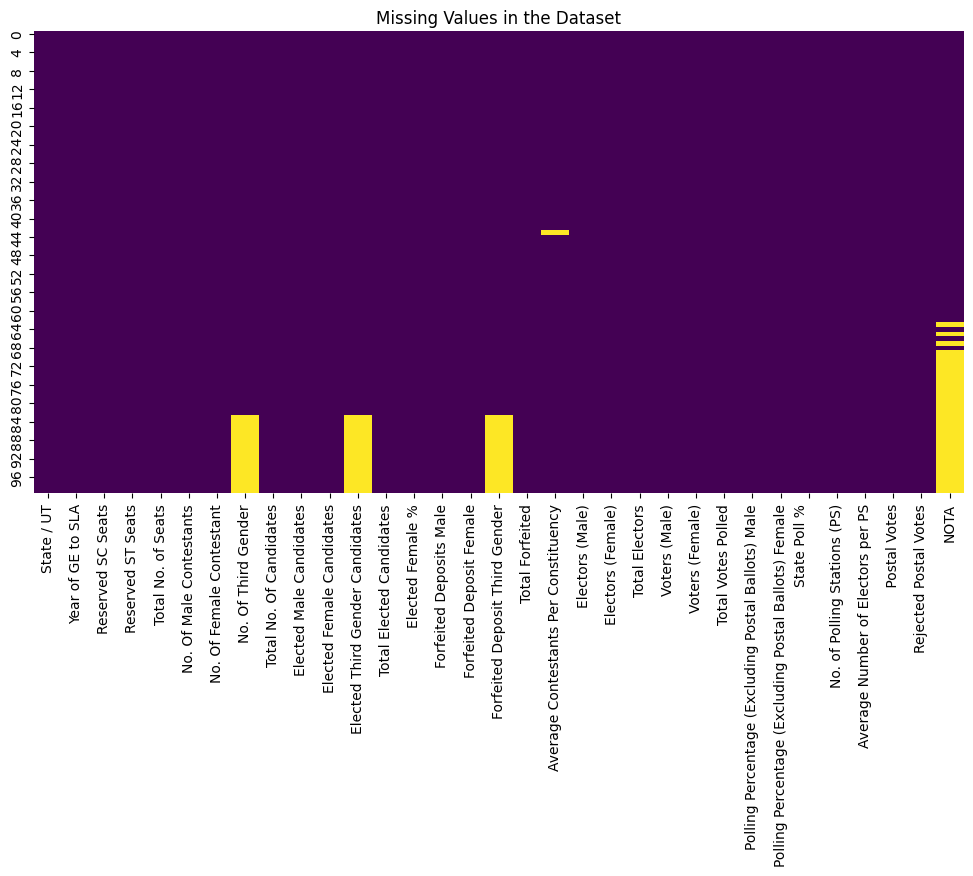

In [18]:
# Check for missing values in the dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df_1.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in the Dataset')
plt.show()

In [19]:
# Imputation for missing values based on the suggested strategies

# Impute 'No. Of Third Gender', 'Forfeited Deposit Third Gender', 'Elected Third Gender Candidates' with 0
df_1 = df_1.fillna({
    'No. Of Third Gender': 0,
    'Forfeited Deposit Third Gender': 0,
    'Elected Third Gender Candidates': 0
})

# Impute 'NOTA' with the median value
df_1['NOTA'] = df_1['NOTA'].fillna(df_1['NOTA'].median())

# Impute missing values in 'Average Contestants Per Constituency' with the median
df_1['Average Contestants Per Constituency'] = df_1['Average Contestants Per Constituency'].fillna(df_1['Average Contestants Per Constituency'].median())

In [20]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 33 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   State / UT                                            100 non-null    object 
 1   Year of GE to SLA                                     100 non-null    float64
 2   Reserved SC Seats                                     100 non-null    float64
 3   Reserved ST Seats                                     100 non-null    float64
 4   Total No. of Seats                                    100 non-null    float64
 5   No. Of Male Contestants                               100 non-null    float64
 6   No. Of Female Contestant                              100 non-null    float64
 7   No. Of Third Gender                                   100 non-null    float64
 8   Total No. Of Candidates                               100 non

**Summary of Imputation Methods:**

No. of Third Gender: Impute with 0 (assumed absence).

Forfeited Deposit Third Gender: Impute with 0 (assumed absence).

Elected Third Gender Candidates: Impute with 0 (assumed absence).


NOTA: Impute with median to reflect a typical trend and avoid underrepresenting constituencies.

**Objective 1: Investigating the Importance of Women's Participation**

In [23]:
# Step 1: Group by both 'Year of GE to SLA' and 'State / UT' and calculate the sum of elected female candidates and total contestants
df_grouped = df_1.groupby(['Year of GE to SLA', 'State / UT']).agg({ # Changed df_1groupby to df_1.groupby()
    'Elected Female Candidates': 'sum',
    'Total No. Of Candidates': 'sum'
}).reset_index()

# Step 2: Calculate the proportion of elected female candidates to total contestants
df_grouped['Proportion of Elected Female to Total Contestants'] = (df_grouped['Elected Female Candidates'] / df_grouped['Total No. Of Candidates']) * 100


import plotly.express as px
import pandas as pd

# Step 3: Prepare the data for Plotly (melt the pivot table to long format)
df_pivot = df_grouped.pivot(index='Year of GE to SLA', columns='State / UT', values='Proportion of Elected Female to Total Contestants')
df_long = pd.melt(df_pivot.reset_index(), id_vars=['Year of GE to SLA'], var_name='State / UT', value_name='Proportion of Elected Female')

# Step 4: Create the interactive stacked bar plot with Plotly
fig = px.bar(
    df_long,
    x='Year of GE to SLA',
    y='Proportion of Elected Female',
    color='State / UT',
    title='Proportion of Elected Female Candidates by Year and State (2011-2023)',
    labels={'Proportion of Elected Female': 'Proportion (%)'},
    barmode='stack'
)

# Step 5: Customize the layout for better readability
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Proportion of Elected Female Candidates (%)',
    legend_title_text='State / UT',
    legend=dict(
        orientation="v",
        entrywidth=50,  # Adjust the width of legend entries
        title_text='State / UT',
        xanchor='right'
    ),
    hovermode="x unified"  # Shows hover information for all states at the same x value
)

# Display the interactive plot
fig.show()

The interactive stacked bar plot reveals fluctuations in the proportion of elected female candidates across the years from 2011 to 2023. Notably, 2019 and 2023 saw higher female representation across many states, while 2015 and 2017 had lower proportions. These variations likely reflect shifts in election dynamics, political strategies, or initiatives promoting gender diversity.

States like Kerala, Rajasthan, West Bengal, and Tamil Nadu consistently show strong female representation over multiple years, indicating potential voter support or gender-specific policies that promote female candidates. On the other hand, states such as Nagaland, Meghalaya, and Manipur contribute little to female representation, suggesting challenges in promoting female candidates in these regions.

There are significant yearly changes, particularly in 2019 and 2023, which may be attributed to party-driven initiatives or social movements promoting gender equality. In contrast, years like 2015 saw fewer female candidates, likely due to different political climates. States with consistent contributions likely have stable political and social support, while states with sporadic participation may experience political fluctuations or inconsistent support for female candidates.

<Figure size 1200x800 with 0 Axes>

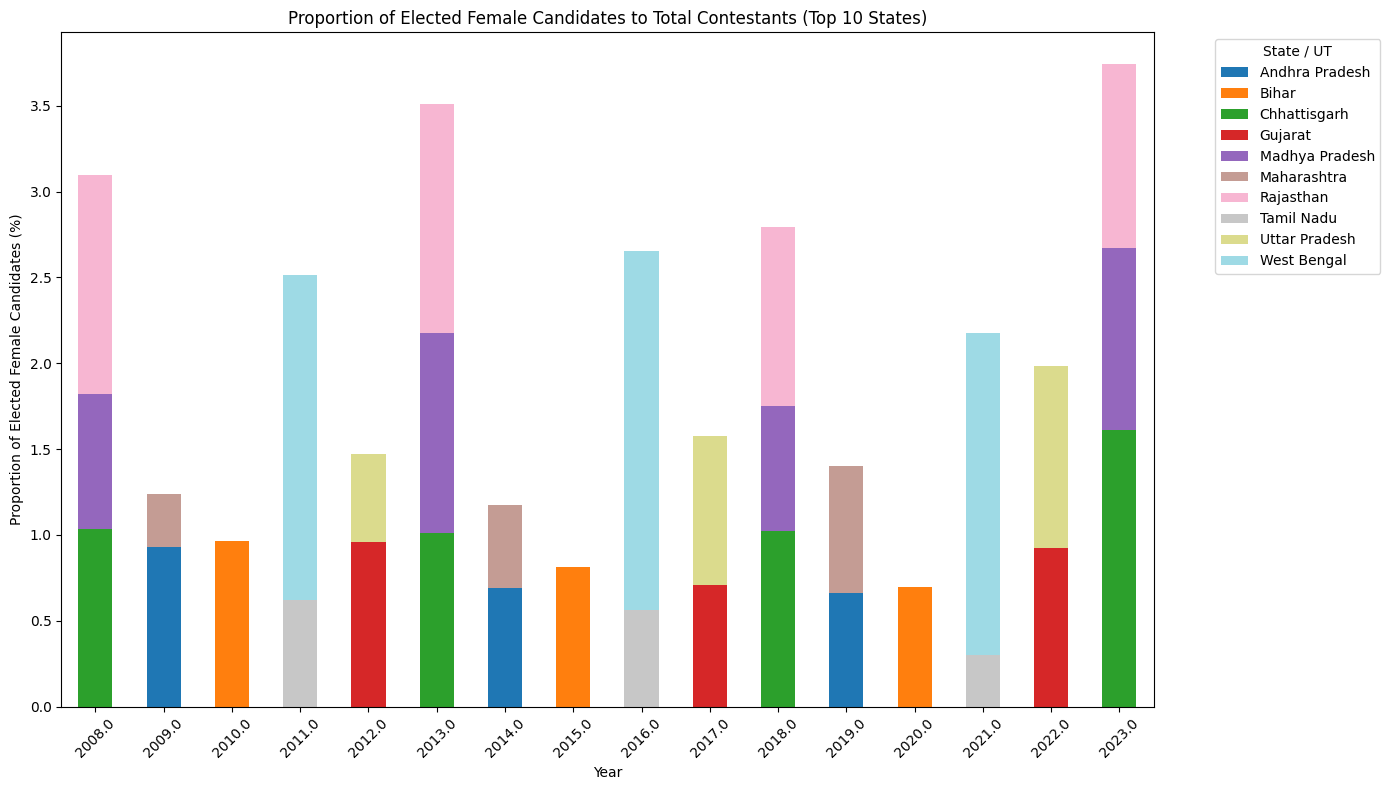

In [24]:
# Find the top N states by total elected female candidates across all years
top_n_states = df_grouped.groupby('State / UT')['Elected Female Candidates'].sum().nlargest(10).index

# Filter the dataset to include only the top N states
df_top_n = df_grouped[df_grouped['State / UT'].isin(top_n_states)]

# Pivot for the stacked bar plot
df_pivot_top_n = df_top_n.pivot(index='Year of GE to SLA', columns='State / UT', values='Proportion of Elected Female to Total Contestants')

# Plot
plt.figure(figsize=(12, 8))
df_pivot_top_n.plot(kind='bar', stacked=True, cmap='tab20', figsize=(14, 8))

plt.title('Proportion of Elected Female Candidates to Total Contestants (Top 10 States)')
plt.ylabel('Proportion of Elected Female Candidates (%)')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.legend(title='State / UT', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<ipython-input-25-7cacb53e157a>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




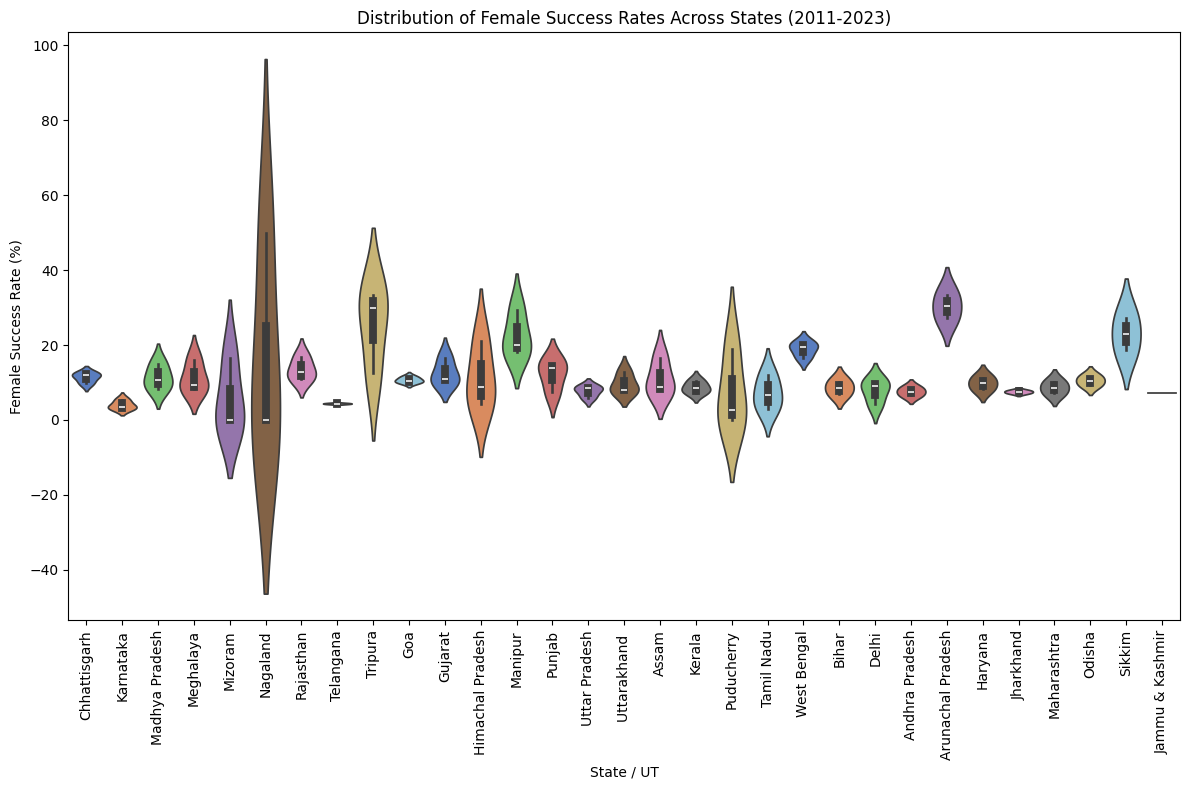

In [25]:
# Step 1: Calculate the female success rate (percentage of elected female candidates)
df_1['Female Success Rate'] = (df_1['Elected Female Candidates'] / df_1['No. Of Female Contestant']) * 100

# Step 2: Filter data for years 2011 to 2023
df_filtered = df_1[(df_1['Year of GE to SLA'] >= 2011) & (df_1['Year of GE to SLA'] <= 2023)]

# Step 3: Create the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='State / UT', y='Female Success Rate', data=df_filtered, inner='box', palette='muted')

# Customize the plot
plt.title('Distribution of Female Success Rates Across States (2011-2023)')
plt.xlabel('State / UT')
plt.ylabel('Female Success Rate (%)')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()


The violin plot reveals significant variation in female success rates across different states from 2011 to 2023. States like Nagaland and Madhya Pradesh show wide distributions, indicating a high level of fluctuation in the success rates of female candidates, whereas states like Karnataka and Tamil Nadu exhibit narrower distributions, reflecting more consistent female success over time.

States such as Madhya Pradesh, Rajasthan, and Telangana stand out with higher peaks in female success rates, suggesting favorable conditions for female candidates in these regions, possibly due to supportive political strategies or voter sentiment. On the other hand, states like Meghalaya, Nagaland, and Mizoram show lower or even negative success rates, indicating significant challenges for female candidates in these areas.

Certain states, such as Karnataka, Goa, and Tamil Nadu, display stable success rates, suggesting consistent support for female candidates, while others like Rajasthan show outliers, hinting at occasional political or social shifts that significantly impact female success.

In [26]:
df_1['Female Success Rate'] = (df_1['Elected Female Candidates'] / df_1['No. Of Female Contestant']) * 100
# Select features related to electors and female success rate
selected_features = df_1[['Electors (Female)', 'Electors (Male)', 'Female Success Rate', 'Proportion of Female Electors']]

# Create a pair plot
sns.pairplot(selected_features)
plt.show()


KeyError: "['Proportion of Female Electors'] not in index"

Strong Correlation Between Female and Male Electors:

There is a clear linear correlation between the number of female electors and male electors. This is evident from the tight clustering of points along the diagonal in the scatter plot between these two variables.
Insight: States with higher female electors generally have higher male electors, indicating that both genders tend to have proportional representation in the voter pool across regions.

The scatter plots between Female Success Rate and both Electors (Female) and Electors (Male) show a weak, scattered relationship, with no clear pattern emerging.
Insight: A higher number of female or male electors doesn't necessarily translate into a higher female success rate. This suggests that the factors determining female electoral success are likely independent of the sheer number of voters.

Proportion of Female Electors vs. Success Rate:

The relationship between the Proportion of Female Electors and Female Success Rate is weak, as the scatter plot between these two variables shows no clear trend.
Insight: Even when the proportion of female electors is higher, it does not necessarily result in a higher female success rate, indicating that other factors, such as political support or societal norms, might have a stronger impact on female success.

In [ ]:
df_year_grouped = df_1.groupby('Year of GE to SLA')[['No. Of Female Contestant', 'Elected Female Candidates']].sum()
df_year_grouped.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Trend of Female Participation and Success Over Time')
plt.ylabel('Count')
plt.xlabel('Year of GE to SLA')
plt.show()


The number of female contestants has fluctuated significantly between 2008 and 2023. Notable peaks are seen in 2014, 2018, and 2023, where the number of female contestants surpassed 900, while years like 2010 and 2020 saw sharp declines in participation.


Despite the fluctuations in the number of female contestants, the number of elected female candidates remains relatively stable and low throughout the years, rarely exceeding 150 elected females. This indicates that while more women may contest elections, the success rate of female candidates does not increase proportionally with their participation.
Insight: There may be underlying barriers preventing female candidates from translating participation into electoral success. These barriers could be due to voter biases, limited political support, or structural challenges that limit women's ability to win elections.

There is a noticeable upward trend in female participation from 2020 to 2023, with 2023 seeing the highest number of female contestants in the dataset. However, this increase in participation is not matched by a significant rise in the number of elected female candidates.

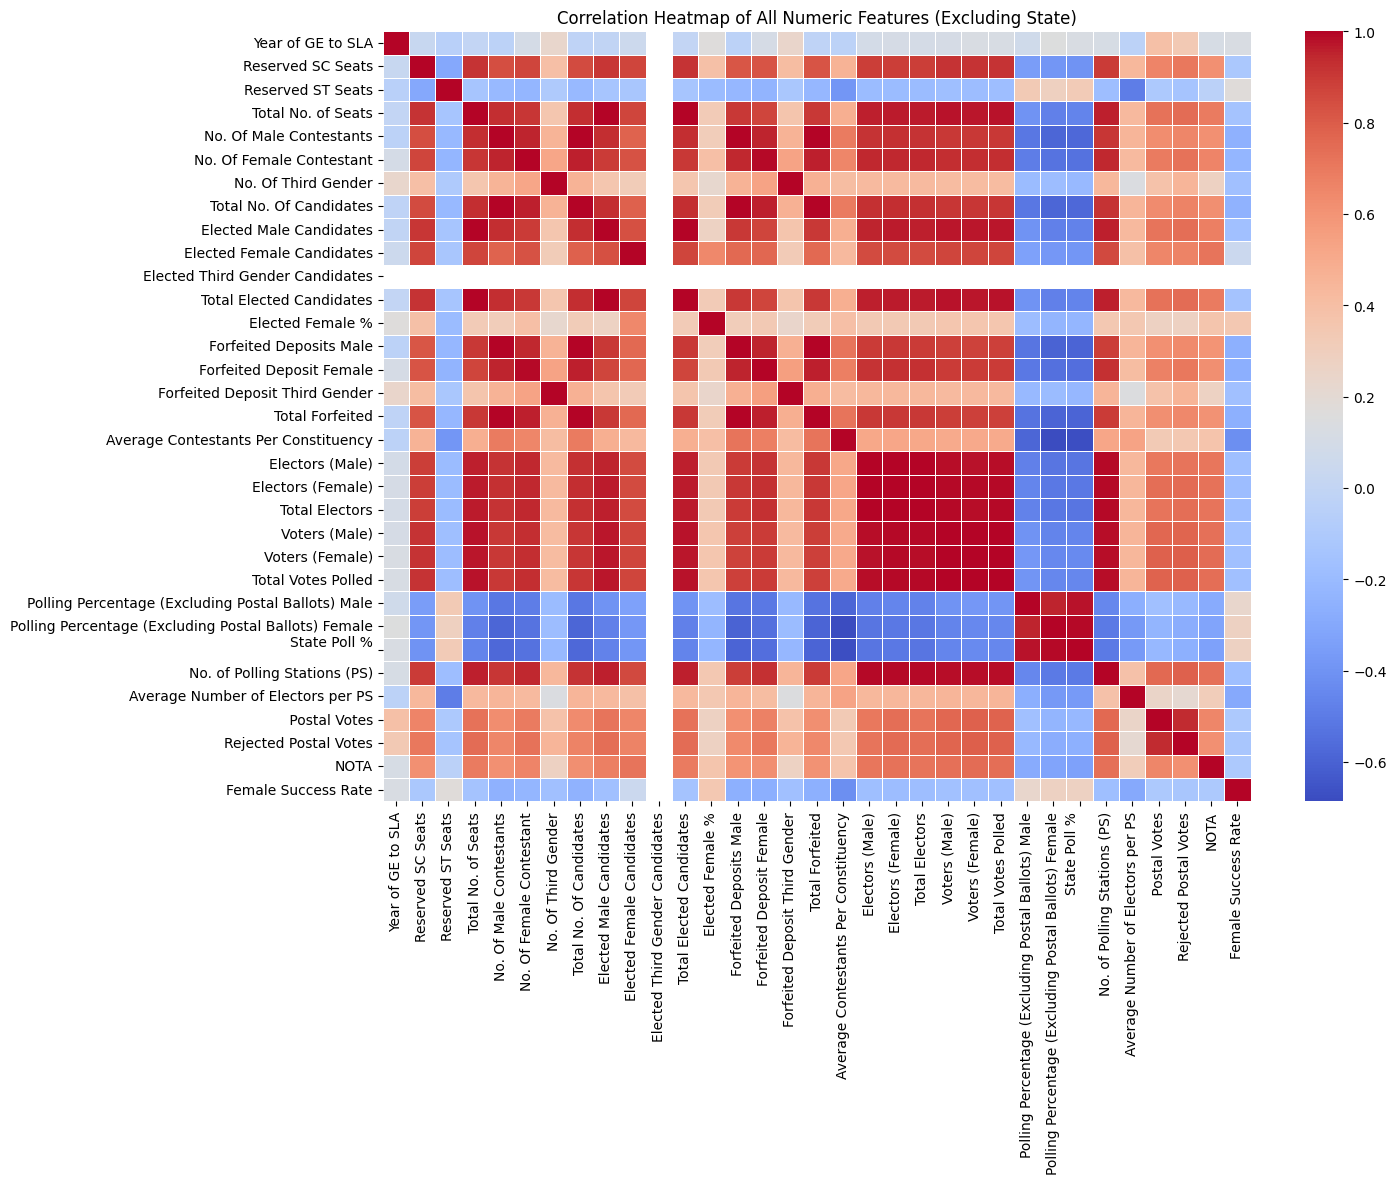

In [27]:
# Drop the 'State / UT' column (or any other non-numeric column) before calculating the correlation matrix
df_numeric = df_1.drop(columns=['State / UT'])

# Now, calculate the correlation matrix for the numeric columns only
correlation_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of All Numeric Features (Excluding State)')
plt.show()


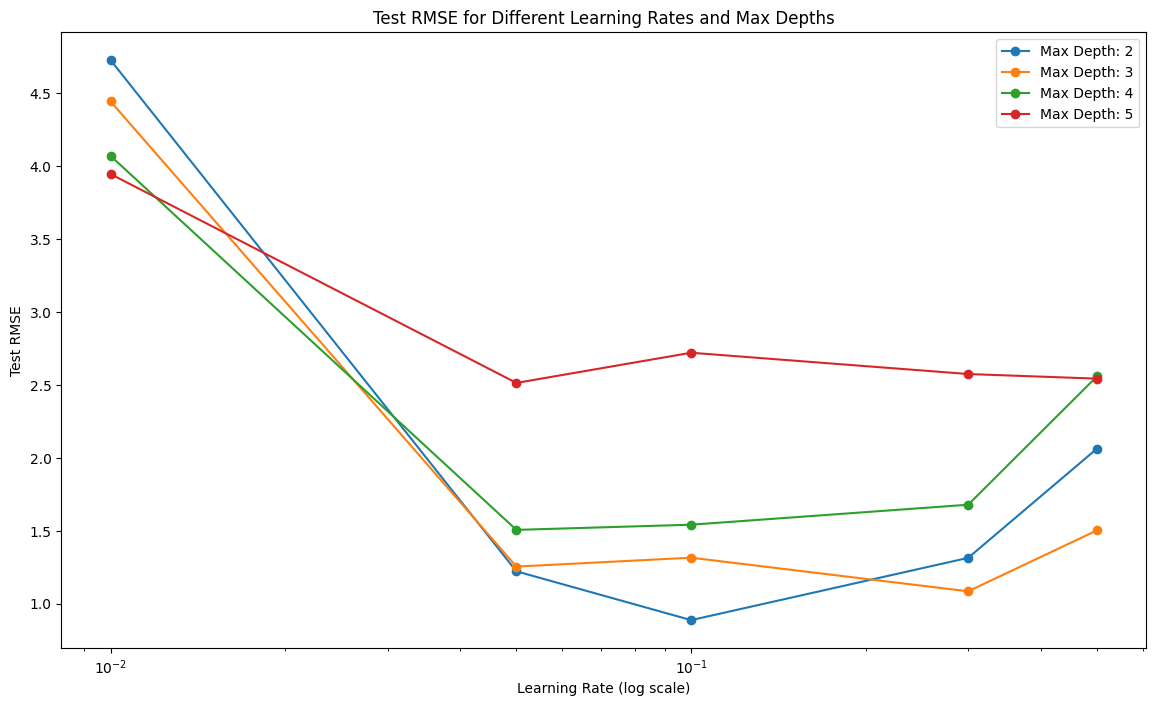

Best Learning Rate: 0.1
Best Max Depth: 2
Best Test RMSE: 0.8875645109242227


In [28]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: One-Hot Encode the 'State / UT' column
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
state_encoded = one_hot_encoder.fit_transform(df_1[['State / UT']])
state_encoded_df = pd.DataFrame(state_encoded, columns=one_hot_encoder.get_feature_names_out(['State / UT']))

# Concatenate the one-hot encoded 'State / UT' to the original dataset
df_encoded = pd.concat([df_1.drop(columns=['State / UT']), state_encoded_df], axis=1)

# Step 2: Prepare features (X) and target variable (y)
X = df_encoded.drop(columns=['Elected Female Candidates'])  # Features
y = df_encoded['Elected Female Candidates']  # Target variable

# Step 3: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Evaluate performance for different learning rates and max depths
learning_rates = [0.01, 0.05, 0.1, 0.3, 0.5]  # Try different learning rates
max_depths = [2, 3, 4, 5]  # Try different max depths

# Initialize lists to store results
results = {'learning_rate': [], 'max_depth': [], 'train_rmse': [], 'test_rmse': []}

for lr in learning_rates:
    for md in max_depths:
        # Train the Gradient Boosting Regressor model
        gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=lr, max_depth=md, random_state=42)
        gbr.fit(X_train, y_train)

        # Predict for training and test sets
        y_train_pred = gbr.predict(X_train)
        y_test_pred = gbr.predict(X_test)

        # Calculate RMSE for both training and test sets
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

        # Store the results
        results['learning_rate'].append(lr)
        results['max_depth'].append(md)
        results['train_rmse'].append(train_rmse)
        results['test_rmse'].append(test_rmse)

# Convert results into a DataFrame for easier plotting
df_results = pd.DataFrame(results)

# Step 5: Plot the results
plt.figure(figsize=(14, 8))

for md in max_depths:
    plt.plot(
        df_results[df_results['max_depth'] == md]['learning_rate'],
        df_results[df_results['max_depth'] == md]['test_rmse'],
        marker='o',
        label=f'Max Depth: {md}'
    )

# Customizing the plot for better insights
plt.xscale('log')  # Use log scale for learning rate
plt.xlabel('Learning Rate (log scale)')
plt.ylabel('Test RMSE')
plt.title('Test RMSE for Different Learning Rates and Max Depths')
plt.legend()
plt.show()

# Step 6: Print the best learning rate and max depth
best_index = df_results['test_rmse'].idxmin()
best_lr = df_results.loc[best_index, 'learning_rate']
best_md = df_results.loc[best_index, 'max_depth']
best_rmse = df_results.loc[best_index, 'test_rmse']

print(f"Best Learning Rate: {best_lr}")
print(f"Best Max Depth: {best_md}")
print(f"Best Test RMSE: {best_rmse}")


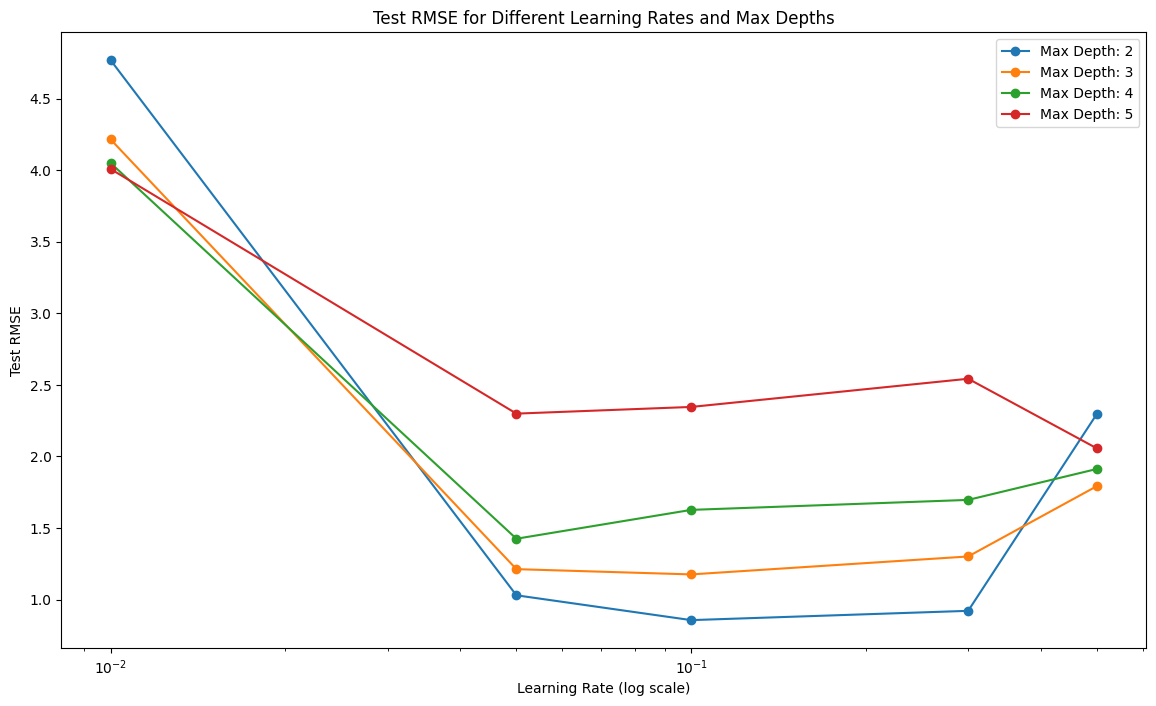

Best Learning Rate: 0.1
Best Max Depth: 2
Best Test RMSE: 0.8569016697440225


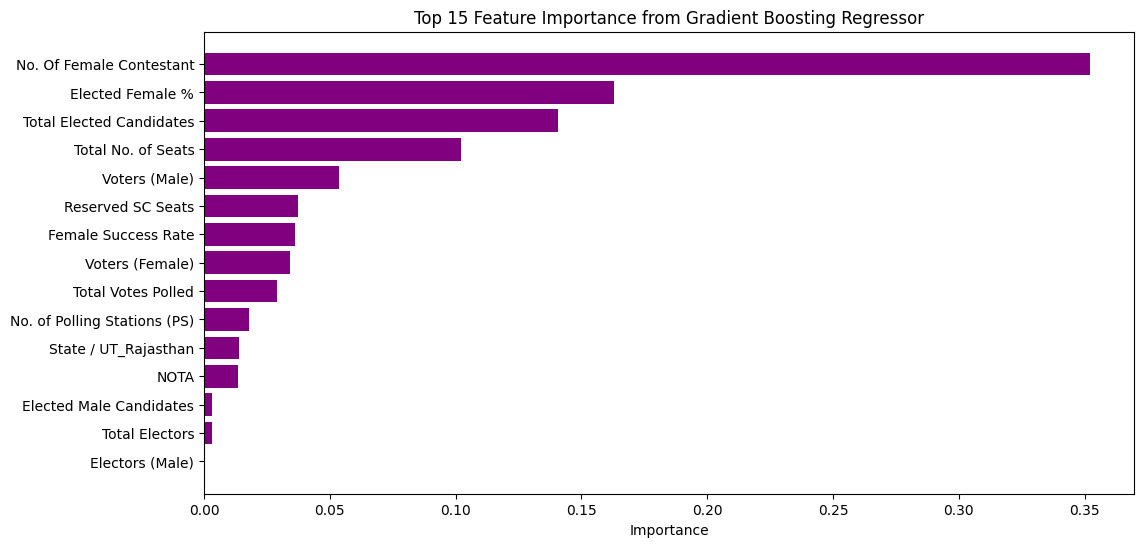

                         Feature  Importance
0       No. Of Female Contestant    0.351970
2               Elected Female %    0.163034
3       Total Elected Candidates    0.140649
1             Total No. of Seats    0.102243
7                  Voters (Male)    0.053560
8              Reserved SC Seats    0.037557
4            Female Success Rate    0.036109
9                Voters (Female)    0.034112
10            Total Votes Polled    0.028864
6   No. of Polling Stations (PS)    0.017781
12          State / UT_Rajasthan    0.014056
11                          NOTA    0.013397
14       Elected Male Candidates    0.003073
13                Total Electors    0.003033
5                Electors (Male)    0.000562
Final RMSE on Test Data: 0.8569016697440225


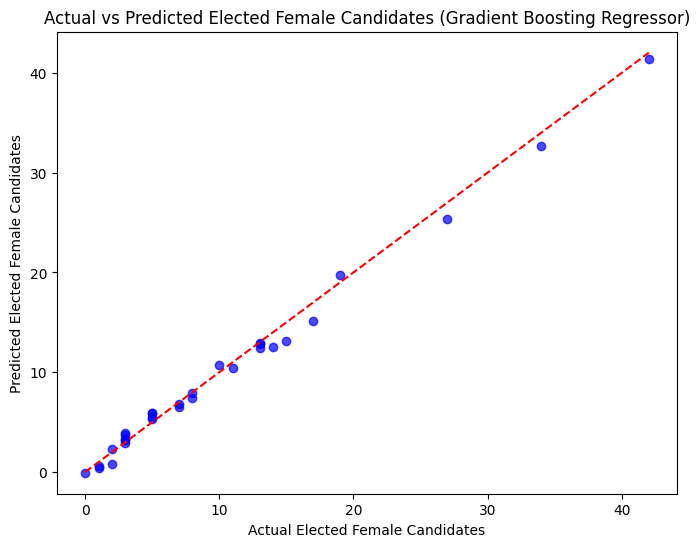

In [31]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: One-Hot Encode the 'State / UT' column
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
state_encoded = one_hot_encoder.fit_transform(df_1[['State / UT']])
state_encoded_df = pd.DataFrame(state_encoded, columns=one_hot_encoder.get_feature_names_out(['State / UT']))

# Concatenate the one-hot encoded 'State / UT' to the original dataset
df_encoded = pd.concat([df_1.drop(columns=['State / UT']), state_encoded_df], axis=1)

# Step 2: Select the top 15 important features based on prior analysis
top_15_features = [
    'No. Of Female Contestant', 'Total No. of Seats', 'Elected Female %',
    'Total Elected Candidates', 'Female Success Rate', 'Electors (Male)',
    'No. of Polling Stations (PS)', 'Voters (Male)', 'Reserved SC Seats',
    'Voters (Female)', 'Total Votes Polled', 'NOTA', 'State / UT_Rajasthan',
    'Total Electors', 'Elected Male Candidates'
]

X = df_encoded[top_15_features]  # Use only the top 15 features
y = df_encoded['Elected Female Candidates']  # Target variable

# Step 3: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train and evaluate performance for different learning rates and max depths
learning_rates = [0.01, 0.05, 0.1, 0.3, 0.5]
max_depths = [2, 3, 4, 5]

# Initialize lists to store results
results = {'learning_rate': [], 'max_depth': [], 'train_rmse': [], 'test_rmse': []}

for lr in learning_rates:
    for md in max_depths:
        # Train the Gradient Boosting Regressor model
        gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=lr, max_depth=md, random_state=42)
        gbr.fit(X_train, y_train)

        # Predict for training and test sets
        y_train_pred = gbr.predict(X_train)
        y_test_pred = gbr.predict(X_test)

        # Calculate RMSE for both training and test sets
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

        # Store the results
        results['learning_rate'].append(lr)
        results['max_depth'].append(md)
        results['train_rmse'].append(train_rmse)
        results['test_rmse'].append(test_rmse)

# Convert results into a DataFrame for easier plotting
df_results = pd.DataFrame(results)

# Step 5: Plot the results
plt.figure(figsize=(14, 8))

for md in max_depths:
    plt.plot(
        df_results[df_results['max_depth'] == md]['learning_rate'],
        df_results[df_results['max_depth'] == md]['test_rmse'],
        marker='o',
        label=f'Max Depth: {md}'
    )

# Customizing the plot for better insights
plt.xscale('log')  # Use log scale for learning rate
plt.xlabel('Learning Rate (log scale)')
plt.ylabel('Test RMSE')
plt.title('Test RMSE for Different Learning Rates and Max Depths')
plt.legend()
plt.show()

# Step 6: Print the best learning rate and max depth
best_index = df_results['test_rmse'].idxmin()
best_lr = df_results.loc[best_index, 'learning_rate']
best_md = df_results.loc[best_index, 'max_depth']
best_rmse = df_results.loc[best_index, 'test_rmse']

print(f"Best Learning Rate: {best_lr}")
print(f"Best Max Depth: {best_md}")
print(f"Best Test RMSE: {best_rmse}")

# Step 7: Train the best model with the optimal hyperparameters
best_gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=best_lr, max_depth=best_md, random_state=42)
best_gbr.fit(X_train, y_train)

# Step 8: Plot the feature importance
importances = best_gbr.feature_importances_

# Get the feature names
feature_names = X.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='purple')
plt.xlabel('Importance')
plt.title('Top 15 Feature Importance from Gradient Boosting Regressor')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.show()

# Optional: Print feature importance details
print(feature_importance_df)

# Step 9: Use the trained model to predict
y_pred = best_gbr.predict(X_test)

# Step 10: Calculate RMSE for the final model on the test set
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Final RMSE on Test Data: {final_rmse}")

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of perfect prediction
plt.xlabel('Actual Elected Female Candidates')
plt.ylabel('Predicted Elected Female Candidates')
plt.title('Actual vs Predicted Elected Female Candidates (Gradient Boosting Regressor)')
plt.show()


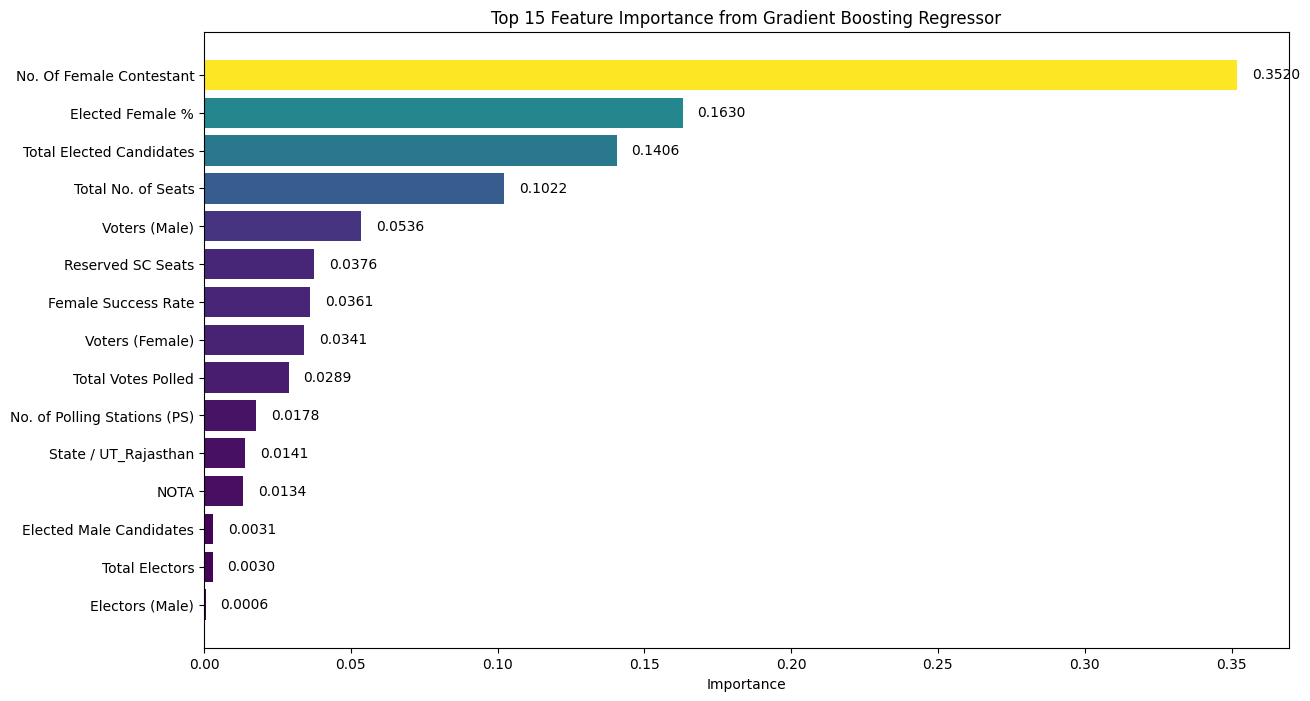

                         Feature  Importance
0       No. Of Female Contestant    0.351970
2               Elected Female %    0.163034
3       Total Elected Candidates    0.140649
1             Total No. of Seats    0.102243
7                  Voters (Male)    0.053560
8              Reserved SC Seats    0.037557
4            Female Success Rate    0.036109
9                Voters (Female)    0.034112
10            Total Votes Polled    0.028864
6   No. of Polling Stations (PS)    0.017781
12          State / UT_Rajasthan    0.014056
11                          NOTA    0.013397
14       Elected Male Candidates    0.003073
13                Total Electors    0.003033
5                Electors (Male)    0.000562


In [32]:
# Sort feature importance
sorted_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(15)  # Display top 15 features

# Plot the feature importance with improvements
plt.figure(figsize=(14, 8))
colors = plt.cm.viridis(sorted_importance_df['Importance'] / max(sorted_importance_df['Importance']))  # Color gradient

bars = plt.barh(sorted_importance_df['Feature'], sorted_importance_df['Importance'], color=colors)

# Add text labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.005, bar.get_y() + bar.get_height() / 2, f'{width:.4f}', va='center')

# Invert y-axis to have the highest at the top
plt.gca().invert_yaxis()

plt.xlabel('Importance')
plt.title('Top 15 Feature Importance from Gradient Boosting Regressor')
plt.show()

# Print the most important features
print(sorted_importance_df)


Objective 2: Investigating Factors Contributing to NOTA Votes

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



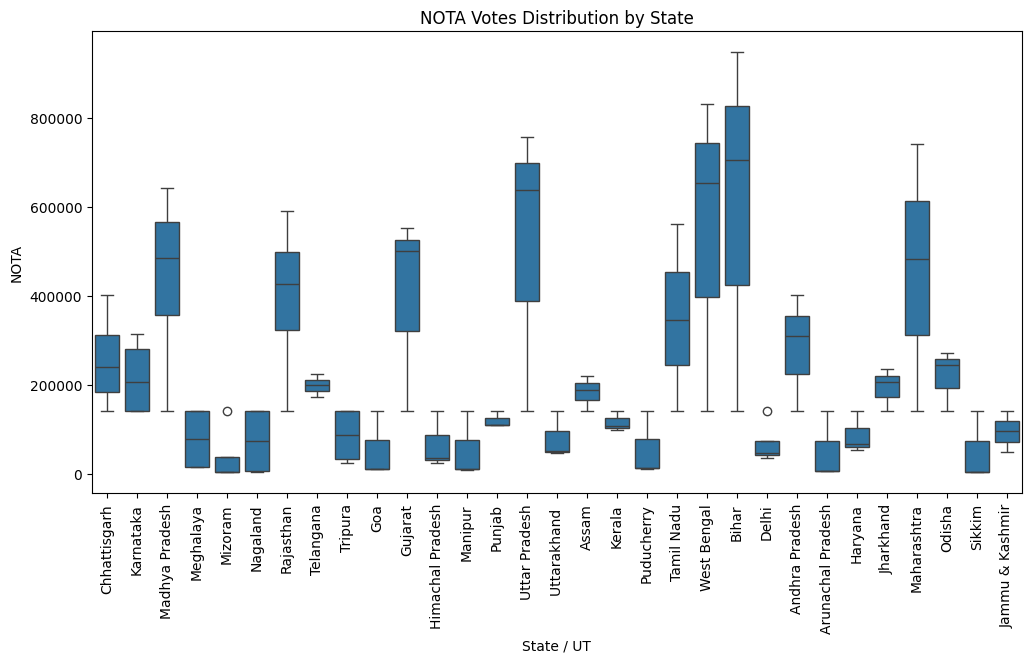

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='State / UT', y='NOTA', data=df_1)
plt.title('NOTA Votes Distribution by State')
plt.xticks(rotation=90)
plt.show()


High NOTA Votes in Specific States:

States like Madhya Pradesh, Uttar Pradesh, and Bihar exhibit high NOTA votes with substantial variability. These states consistently show the largest spread of NOTA votes, indicating a significant portion of the electorate in these regions is dissatisfied with the available candidates.
Insight: High voter dissatisfaction in these regions could be due to political dynamics, lack of trusted candidates, or regional socio-economic issues.
Low NOTA Votes in Some States:

States such as Meghalaya, Mizoram, Goa, and Sikkim show relatively low and tightly grouped NOTA votes. The smaller spread suggests less voter dissatisfaction, with fewer people opting for the NOTA option.
Insight: These states might have fewer contested elections or higher satisfaction with the political candidates, resulting in less use of the NOTA option.
Wide Variation in Certain States:

States like West Bengal and Rajasthan show a wide range of NOTA votes, suggesting inconsistent voter dissatisfaction across different constituencies. These states have outliers and broad interquartile ranges, indicating that while some constituencies have very high NOTA votes, others have much lower.
Insight: This variation could be due to differing political contests or local issues within the state that drive voter dissatisfaction unevenly across regions.
Outliers in Specific States:

There are notable outliers in states like Tamil Nadu, Meghalaya, and Delhi, where a small number of constituencies have significantly higher or lower NOTA votes compared to the rest of the state.
Insight: These outliers may indicate specific instances where voter dissatisfaction was exceptionally high in certain areas, suggesting the need for deeper analysis into local factors influencing these spikes in NOTA votes.
Median NOTA Levels:

States like Gujarat, Punjab, and Kerala show moderate levels of NOTA votes with relatively consistent patterns. Their median NOTA values are centered, showing fewer extreme cases of voter dissatisfaction compared to other states.
Insight: These states might have more stable political climates or better candidate options, leading to less use of the NOTA option compared to states with higher variability.

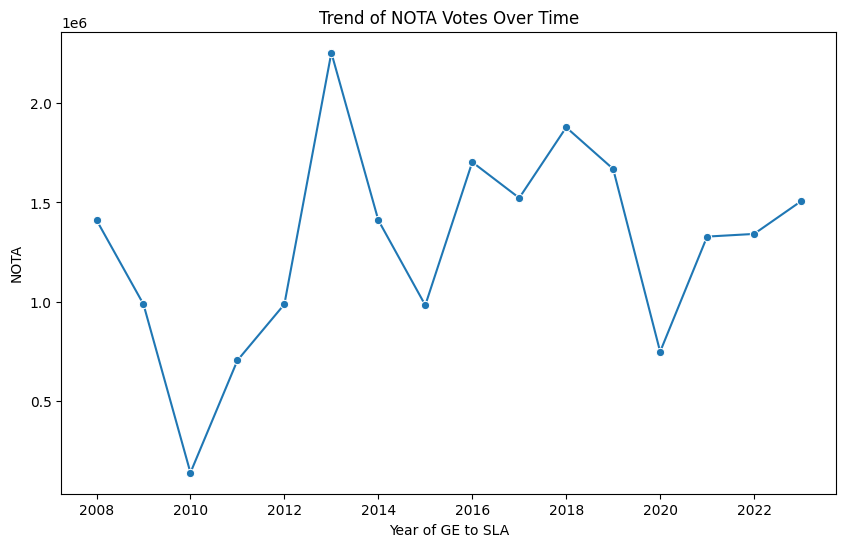

In [34]:
df_year_grouped = df_1.groupby('Year of GE to SLA')['NOTA'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year of GE to SLA', y='NOTA', data=df_year_grouped, marker='o')
plt.title('Trend of NOTA Votes Over Time')
plt.show()


**Peak in 2014:** The highest number of NOTA votes was recorded in 2014, indicating significant voter dissatisfaction during that election year.


**Fluctuations:** NOTA votes show a cyclical pattern, with noticeable peaks in 2014 and 2018, followed by sharp declines, particularly in 2020.


**Recovery Post-2020:** After a significant drop in 2020, the number of NOTA votes started increasing again in 2022, suggesting a potential resurgence in voter dissatisfaction.

Cross-Validation Scores: [0.78571429 0.78571429 0.57142857 0.57142857 0.78571429]
Mean Accuracy from Cross-Validation: 70.00%
Standard Deviation of Accuracy: 10.50%
Accuracy on Test Set: 90.00%

Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         8
         Low       0.79      1.00      0.88        11
      Medium       1.00      0.73      0.84        11

    accuracy                           0.90        30
   macro avg       0.93      0.91      0.91        30
weighted avg       0.92      0.90      0.90        30



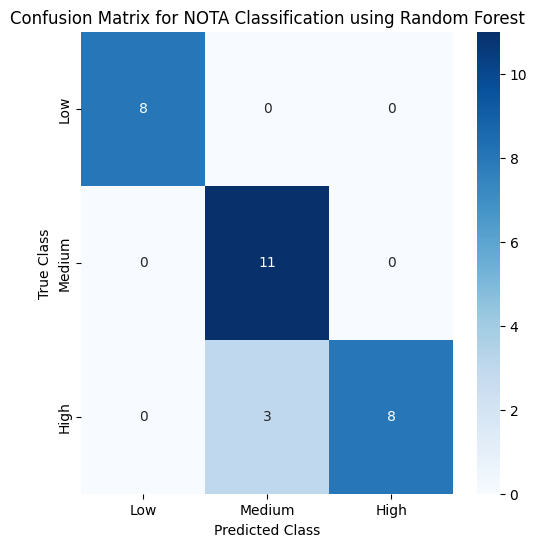

In [35]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Convert NOTA values into categorical classes
# Assuming df_1 has a column 'NOTA' with continuous values
# Let's create 3 categories: Low, Medium, High NOTA based on percentile
df_1['NOTA_Category'] = pd.cut(df_1['NOTA'], bins=[-1, df_1['NOTA'].quantile(0.33), df_1['NOTA'].quantile(0.66), df_1['NOTA'].max()],
                               labels=['Low', 'Medium', 'High'])

# Step 2: One-Hot Encode the 'State / UT' column
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
state_encoded = one_hot_encoder.fit_transform(df_1[['State / UT']])
state_encoded_df = pd.DataFrame(state_encoded, columns=one_hot_encoder.get_feature_names_out(['State / UT']))

# Concatenate the one-hot encoded 'State / UT' to the original dataset
df_encoded = pd.concat([df_1.drop(columns=['State / UT']), state_encoded_df], axis=1)

# Step 3: Prepare features (X) and target variable (y)
X = df_encoded.drop(columns=['NOTA', 'NOTA_Category', 'Elected Female Candidates'])  # Features, remove NOTA and the target column
y = df_encoded['NOTA_Category']  # Target variable

# Step 4: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Set up Stratified K-Fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Step 6: Initialize the Random Forest Classifier model
rfc = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)

# Step 7: Evaluate the Random Forest model using cross-validation
cv_scores = cross_val_score(rfc, X_train, y_train, cv=cv, scoring='accuracy')

# Step 8: Print cross-validation results
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Accuracy from Cross-Validation: {cv_scores.mean() * 100:.2f}%')
print(f'Standard Deviation of Accuracy: {cv_scores.std() * 100:.2f}%')

# Step 9: Train the Random Forest Classifier on the training set
rfc.fit(X_train, y_train)

# Step 10: Make predictions on the test data
y_pred = rfc.predict(X_test)

# Step 11: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on Test Set: {accuracy * 100:.2f}%")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 12: Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix for NOTA Classification using Random Forest')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


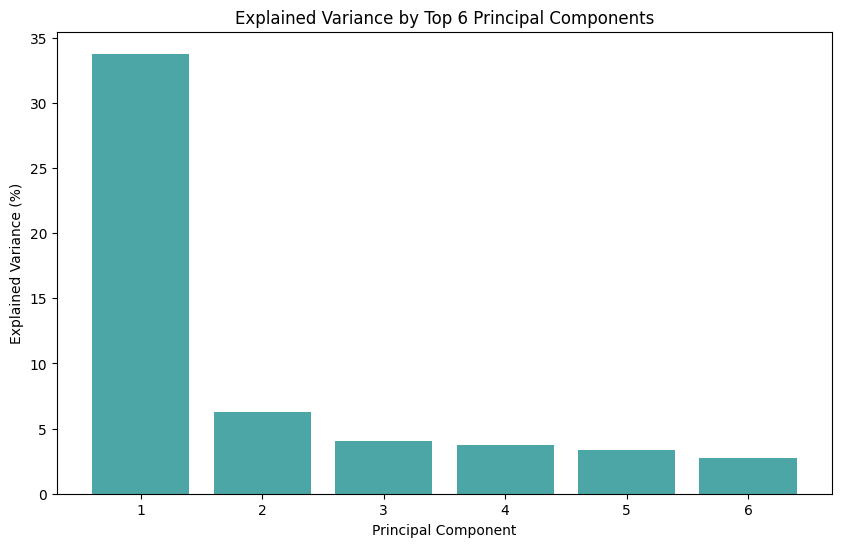

Cross-Validation Scores: [0.7  0.6  0.5  0.55 0.65]
Mean Accuracy from Cross-Validation: 60.00%
Standard Deviation of Accuracy: 7.07%
Accuracy on Test Set using Top 6 PCA components: 63.33%

Classification Report:
              precision    recall  f1-score   support

        High       0.70      0.88      0.78         8
         Low       0.64      0.82      0.72        11
      Medium       0.50      0.27      0.35        11

    accuracy                           0.63        30
   macro avg       0.61      0.66      0.62        30
weighted avg       0.61      0.63      0.60        30



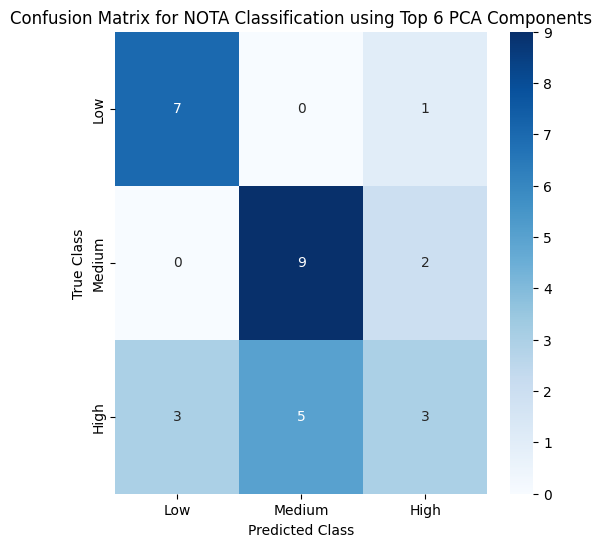

Explained Variance by each of the top 6 PCA components: [0.33761577 0.06293716 0.0405727  0.03703936 0.03369073 0.02765414]


In [38]:
# Import additional library for cross-validation
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Import the PCA class
from sklearn.decomposition import PCA
#Import the StandardScaler
from sklearn.preprocessing import StandardScaler

# Step 1: Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) #Scale the features and store in X_scaled

# Step 2: Apply PCA and retain the top 6 components that capture the most variance
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Plot the explained variance for the top 6 components
explained_variance = pca.explained_variance_ratio_

# Plot explained variance of the top 6 PCA components
plt.figure(figsize=(10, 6))
plt.bar(range(1, 7), explained_variance * 100, color='teal', alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.title('Explained Variance by Top 6 Principal Components')
plt.xticks(range(1, 7))
plt.show()

# Step 4: Cross-Validation setup
# Set up StratifiedKFold cross-validation for balanced classes
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the Random Forest Classifier model
rfc = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)

# Step 5: Evaluate the Random Forest model using cross-validation
cv_scores = cross_val_score(rfc, X_pca, y, cv=cv, scoring='accuracy')

# Step 6: Print cross-validation results
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Accuracy from Cross-Validation: {cv_scores.mean() * 100:.2f}%')
print(f'Standard Deviation of Accuracy: {cv_scores.std() * 100:.2f}%')

# Step 7: Train on the full training set and evaluate
# Split the PCA-transformed data into training and test sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Fit the Random Forest Classifier model
rfc.fit(X_train_pca, y_train)

# Step 8: Make predictions on the test data
y_pred_pca = rfc.predict(X_test_pca)

# Evaluate the model
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy on Test Set using Top 6 PCA components: {accuracy_pca * 100:.2f}%")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_pca))

# Step 9: Plot confusion matrix for PCA-transformed data
conf_matrix_pca = confusion_matrix(y_test, y_pred_pca)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_pca, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Confusion Matrix for NOTA Classification using Top 6 PCA Components')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

# Optional: Print explained variance for top 6 PCA components
print(f'Explained Variance by each of the top 6 PCA components: {explained_variance}')